In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent); os.chdir(set_path)

In [20]:
import torch
import matplotlib.pyplot as plt
from FittedModels.utils import plot_distributions
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from TargetDistributions.Guassian_FullCov import Guassian_FullCov
from FittedModels.Models.DiagonalGaussian import DiagonalGaussian
from FittedModels.utils import plot_distributions, plot_history
from FittedModels.train import LearntDistributionManager


# DReG

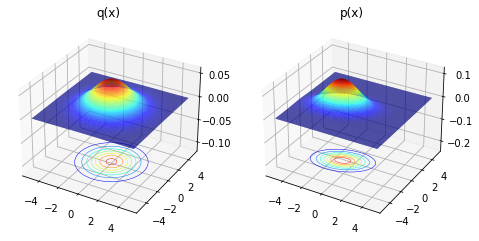

In [14]:
epochs = 20000
dim = 2
n_samples_estimation = int(1e4)
target = Guassian_FullCov(dim=dim)
learnt_sampler = DiagonalGaussian(dim=dim)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="DReG")
fig_before = fig_before_train = plot_distributions(tester, bounds=[[-5, 5], [-5, 5]])
expectation_before, sampling_weights_before = tester.estimate_expectation()

loss: -0.08575081080198288, mean log p_x -3.4417405128479004: 100%|█████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:01<00:00, 326.75it/s]


true expectation is -1.4164270162582397 
estimate before training is -1.351641297340393 
estimate after training is -1.3836582899093628 
effective sample size is 9359.8798828125 
variance in weights is 6.839625532606419e-10


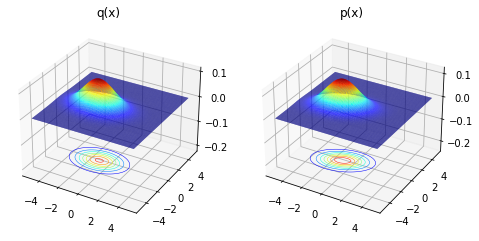

In [15]:
history = tester.train(epochs)
expectation, info = tester.estimate_expectation(n_samples_estimation)
true_expectation = torch.sum(tester.target_dist.mean)

print(f"true expectation is {true_expectation} \n"
      f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size is {info['effective_sample_size']} \n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")
fig_after_train = plot_distributions(tester, bounds=[[-5, 5], [-5, 5]])

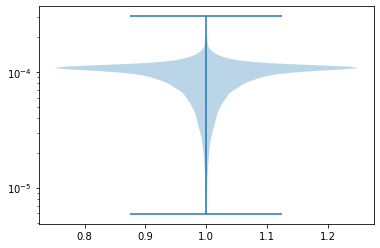

In [16]:
plt.violinplot([info['normalised_sampling_weights']])
plt.yscale("log")

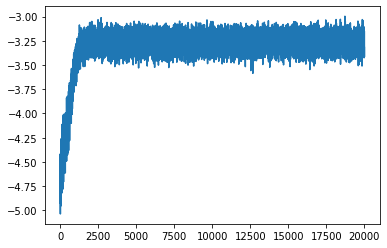

In [17]:
plt.plot(history["log_p_x"])

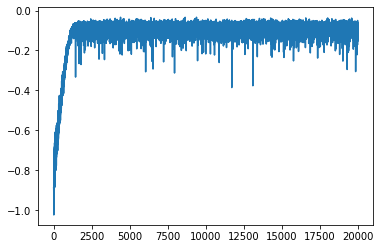

In [18]:
plt.plot(history["loss"])

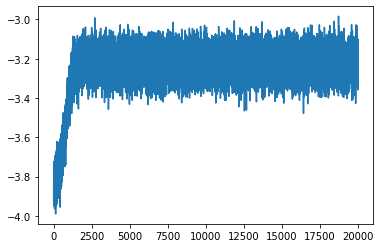

In [19]:
plt.plot(history["log_q_x"])

(<Figure size 432x720 with 8 Axes>,
 array([<AxesSubplot:title={'center':'loss'}>,
        <AxesSubplot:title={'center':'log_p_x'}>,
        <AxesSubplot:title={'center':'log_q_x'}>,
        <AxesSubplot:title={'center':'kl'}>,
        <AxesSubplot:title={'center':'alpha_2_divergence'}>,
        <AxesSubplot:title={'center':'alpha_2_divergence_over_p'}>,
        <AxesSubplot:title={'center':'importance_weights_var'}>,
        <AxesSubplot:title={'center':'normalised_importance_weights_var'}>],
       dtype=object))

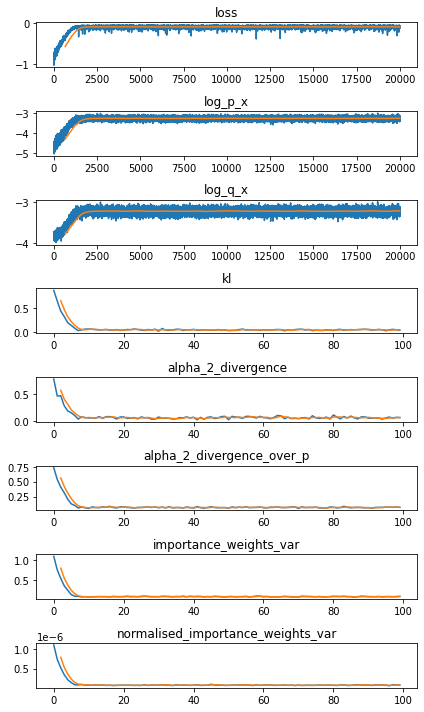

In [21]:
plot_history(history)

# KL

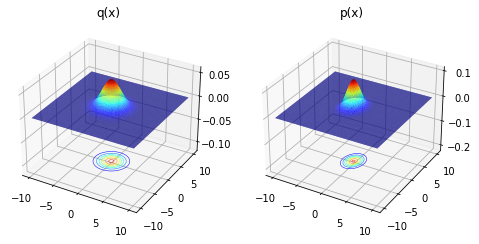

In [9]:
target = Guassian_FullCov(dim=dim)
learnt_sampler = DiagonalGaussian(dim=dim)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="kl")
fig_before = fig_before_train = plot_distributions(tester)
expectation_before, sampling_weights_before = tester.estimate_expectation()

In [10]:
history = tester.train(epochs)
expectation, info = tester.estimate_expectation(n_samples_estimation)
true_expectation = torch.sum(tester.target_dist.mean)

print(f"true expectation is {true_expectation} \n"
      f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size is {info['effective_sample_size']} \n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

loss: 0.0008103083819150925, mean log p_x -3.33821439743042: 100%|██████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:46<00:00, 432.43it/s]

true expectation is -0.32427871227264404 
estimate before training is -0.3299814462661743 
estimate after training is -0.30387547612190247 
effective sample size is 9949.8203125 
variance in weights is 5.043088863176948e-11


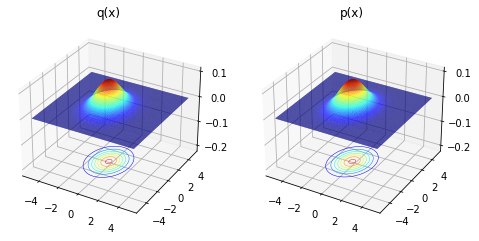

In [11]:
fig_after_train = plot_distributions(tester, bounds=[[-5, 5], [-5, 5]])

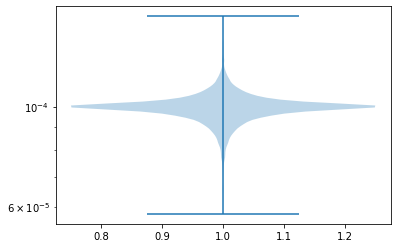

In [12]:
plt.violinplot([info['normalised_sampling_weights']])
plt.yscale("log")

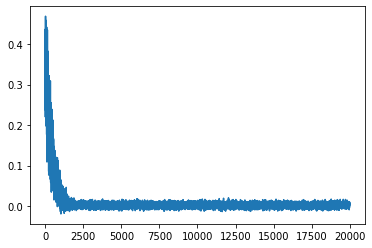

In [13]:
plt.plot(history["loss"])

# Annealed Importance Sampling

In [24]:
from ImportanceSampling.AnnealedImportanceSampler import AnnealedImportanceSampler

In [25]:
annealed_importance_sampler = AnnealedImportanceSampler(tester.learnt_sampling_dist, tester.target_dist)
expectation, info_dict = annealed_importance_sampler.calculate_expectation(n_samples=n_samples_estimation)

In [26]:
info_dict['effective_sample_size'] # so close to number of samples!

tensor(9665.7920)

In [27]:
info_dict.keys()

dict_keys(['effective_sample_size', 'normalised_sampling_weights'])

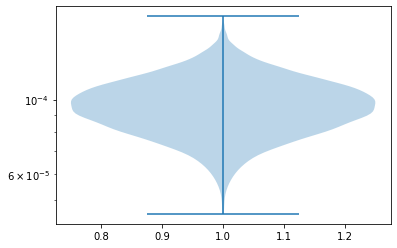

In [28]:
plt.violinplot([info_dict['normalised_sampling_weights']])
plt.yscale("log")